In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from keras.applications import ResNet50
from sklearn.model_selection import train_test_split
import cv2
import numpy as np 

import os

In [11]:
data = "input"
class_names = os.listdir(data)

X = []
y = []

for i, class_name in enumerate(class_names): 
    class_path = os.path.join(data, class_name)
    print(class_name.capitalize(),"has",len(os.listdir(class_path)),"images")
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path) 
        image = cv2.resize(image, (224, 224))
        X.append(image)
        y.append(i)
X = np.array(X)
y = np.array(y)

Daisy has 501 images
Dandelion has 646 images
Rose has 497 images
Sunflower has 495 images
Tulip has 607 images


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
print("Training data has",len(X_train),"images")
print("Validation data has",len(X_val),"images")

Training data has 2196 images
Validation data has 550 images


In [16]:
#Using pre trained weights (Transfer Learning)
ResNet50_base = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
ResNet50_base.trainable = False

model = Sequential()
model.add(ResNet50_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation = "softmax"))


In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [18]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 10)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.5779 - loss: 1.1062 - val_accuracy: 0.8727 - val_loss: 0.3434
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.8766 - loss: 0.3426 - val_accuracy: 0.8909 - val_loss: 0.2972
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9222 - loss: 0.2583 - val_accuracy: 0.9073 - val_loss: 0.2491
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9427 - loss: 0.1925 - val_accuracy: 0.9127 - val_loss: 0.2361
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9661 - loss: 0.1481 - val_accuracy: 0.9127 - val_loss: 0.2475
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9746 - loss: 0.1183 - val_accuracy: 0.9091 - val_loss: 0.2428
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9743 - loss: 0.1029 - val_accuracy: 0.9291 - val_loss: 0.2102
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9836 - loss: 0.0912 - val_accuracy: 0.9164 - v

Text(0.5, 1.0, 'Training and Validation Loss')

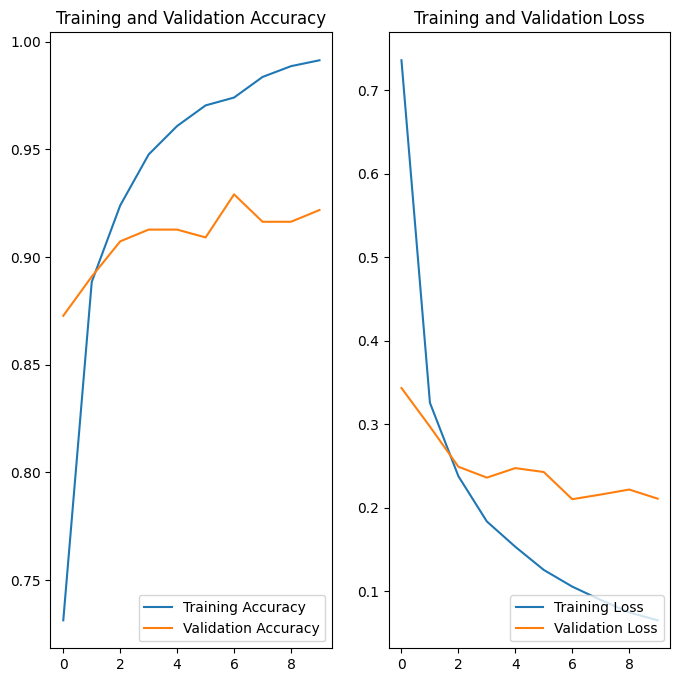

In [19]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(10)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")